<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Valérie Roy</span>
</div>

<img src="media/ensmp-25-alpha.png" />

# `matplotlib` & `pandas`


Les fonctions de `matplotlib` ont été intégrées avec la librairie `pandas` de manière à faciliter leur utilisation à partir d'une dataframe. Nous allons voir quelques unes de ces fonctions. Référez-vous à la documentation pour aller plus loin dans cette utilisation. 

Une dataframe est un table de données en dimension 2 où chacune des colonnes peut être vue comme une variable aléatoire avec une certaine distribution représentant une information: un âge, un genre, une taille...

`matplotlib` va apporter à `pandas` des facilités pour visualiser les données des colonnes sous des formes classiques comme: les boxplots (boîtes à moustaches), les histogrammes, les barcharts (diagrammes à bandes)...

Ou encore pour visualiser les paires de valeurs des colonnes comme la taille en fonction de l'âge...

Nous allons illustrer les quelques fonctions sur un exemple simple.

Importons les librairies:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

## importons un jeu de données

Importons le jeu de données classiques sur trois types d'iris (Versicolor, Virginica et Setosa) décrits par quatre paramètres qui sont les longueur et largeurs des pétales et des sépales.

Exemple des 4 mesures décrites sur un iris versicolor:

<img src='media/versicolor-petal-sepal.jpg' width=200>

In [3]:
file = 'iris.csv'
df = pd.read_csv(file)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Nous voici avec une table qui décrit 150 iris avec 5 paramètres (les 4 mesures et le type):

In [4]:
df.shape

(150, 5)

Les colonnes sont des nombres flottants pour les 4 mesures et de type `object` pour les types.

In [5]:
df.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
dtype: object

et s'agissant de `Name`, nous en avons bien 3

In [6]:
df.groupby('Name').size()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## encodons les catégories par des entiers

Nous allons créer dans la dataframe une nouvelle colonne, de nom `Type`, qui va coder ces trois noms par trois entiers (0, 1 et 2)

Pourquoi on a envie de faire ça ? eh bien lorsqu'on parle de visualisation, c'est toujours plus facile de visualiser des nombres que des textes

Pour y arriver :

1. on prend la colonne `name` qui est de type `object`
1. on la transforme en une colonne de type `category` grâce à la fonction `astype` des dataframes
1. on extrait les codes générés par `pandas` pour les trois noms de types d'iris `cat.codes`
1. on ajoute cette colonne de codes (de type entier) à la dataframe, en l'appelant `Type`

In [7]:
# on crée une nouvelle colonne
df['Type'] = df['Name'].astype('category').cat.codes

Vérifions

In [8]:
df.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
Type              int8
dtype: object

On voit la nouvelle colonne de type `int8`, et elle contient bien ce qu'on veut :

In [9]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Type
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


## dessinons la dataframe - `df.plot()`

Nous pouvons voir dans cet exemple, qu'une simple visualisation des colonnes numériques apporte beaucoup d'informations sur ces données.

Par exemple, dans ce jeu de données, les mesures semblent discriminer les 3 types d'Iris.

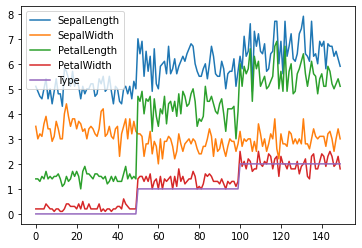

In [10]:
df.plot();

Naturellement la fonction `pandas.DataFrame.plot` aura les mêmes paramètres que la fonction `matplotlib.pyplot.plot` ! elles utilisent toutes les deux la même fonction ! Donc vous pourrez changer le titre, les noms des axes...

Remarquez ici que l'encodage de la famille par notre colonne d'entiers `Type` nous permet de voir immédiatement les 3 familles de fleurs !

## dessinons des boxplots des colonnes - `df.boxplot`

Nous pouvons les dessiner ensemble de manière à ce que les boxplots soient sur la même échelle, et puissent être comparés. Les boxplots comportent: le minimun, le maximum, la médiane, le premier et le troisième quartile...

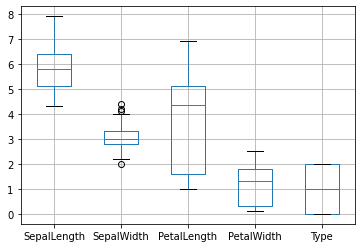

In [11]:
df.boxplot();

Nous pouvons dessiner en donnant la liste des colonnes à afficher.

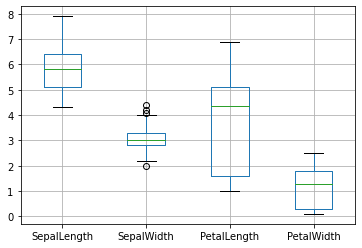

In [12]:
df.boxplot(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']);

On remarque des outliers dans la colonne des `SepalWidth`. Les outliers sont des points en *dehors* de bornes *calculées* indiquées par les moustaches. Ces points sont potentiellement des points *aberrants*. Pour comprendre comment sont calculés les points *extrèmes* lisez les documentations des boîtes à moustache.

Affichons le boxplot de la colonne `SepalWidth`

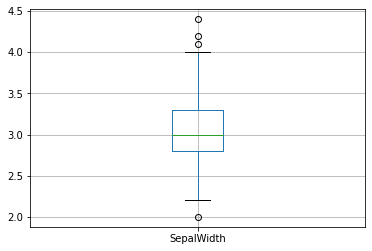

In [13]:
df.boxplot(['SepalWidth']);

Nous pouvons grouper les boxplots suivant les valeurs d'une colonne. Vous vous rappelez `groupby`. C'est très utile:

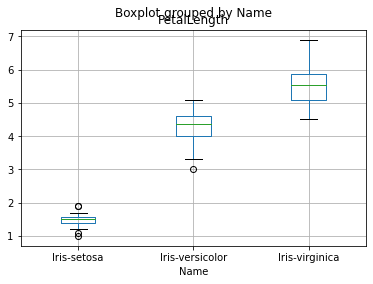

In [14]:
df.boxplot(['PetalLength'], by='Name');

Nous remarquons que les iris *Setosa* ont des `PetalLength` bien plus petits que ceux des autres types d'iris.

## dessinons des histogrammes - `df.hist`

Nous pouvons dessiner les histogrammes de nos dataframes. Ils représentent la distribution des valeurs d'une colonne. Les valeurs de la colonne sont rangées dans des intervalles (ou *bins*) et les nombres de valeurs par intervalles sont affichés.

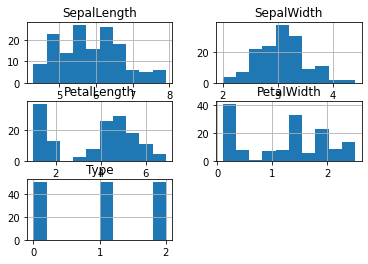

In [15]:
df.hist();

On peut dessiner l'histogramme d'une seule colonne, on peut décider du nombre d'intervalles (*bins=*), de la couleur (*color=*)...

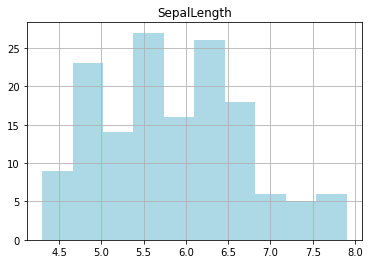

In [16]:
df.hist('SepalLength', bins = 10, color='lightblue');

## dessinons des barcharts (`DataFrame.plot.bar`)

On va prendre un exemple qui illustre mieux cette possibilité. Celui des animaux, de leur vitesse et de leur durée de vie.

In [17]:
df_animals = pd.DataFrame({'speed' : [0.1, 17.5, 40, 48, 52, 69, 88],
                   'lifespan' : [2, 8, 70, 1.5, 25, 12, 28]},
                  index = ['snail', 'pig', 'elephant',
                           'rabbit', 'giraffe', 'coyote', 'horse'])
df_animals

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


On peut avoir des barres verticales:

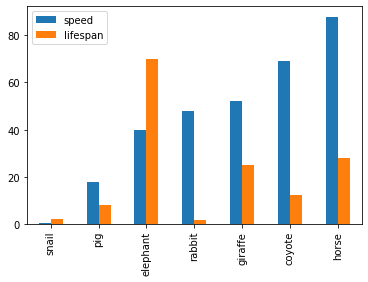

In [18]:
df_animals.plot.bar();

Des barres horizontales:

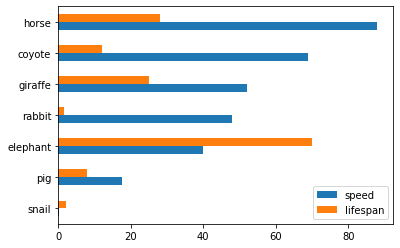

In [19]:
df_animals.plot.barh();

On peut indiquer la vitesse par durée de vie:

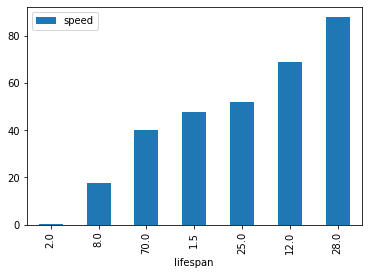

In [20]:
df_animals.plot.bar(x='lifespan', y='speed');

## dessiner des paires de colonnes - `df.plot.scatter`

Dessiner en 2D les colonnes les unes par rapport aux autres peut mettre en valeur des informations intéressantes, surtout quand on ajoute des informations d'autres colonnes par des couleurs ou des tailles de points.

Dans le jeu des données des iris, on peut dessiner une colonne par rapport à une autre en mettant des couleurs différentes aux points suivant le type des iris.

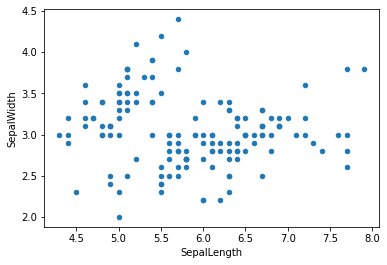

In [21]:
df.plot.scatter(x='SepalLength', y='SepalWidth');

Ce serait bien plus intéressant si on ajoute le type en utilisant une couleur. Par exemple on va considérer que les 3 types, donnés par des entiers, sont 3 couleurs différentes i.e. ces 3 valeurs seront des codes de couleur différents dans la table de couleur par défaut.

Il faut utiliser le paramètre *c=* de la fonction `scatter`.

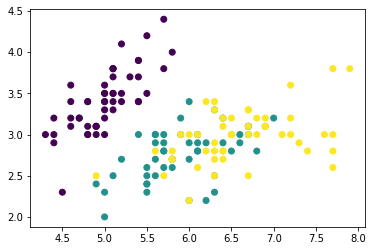

In [22]:
plt.scatter(df['SepalLength'], df['SepalWidth'], c=df['Type']);

On va donner aux points, une taille proportionnelle à la largeur des pétales.

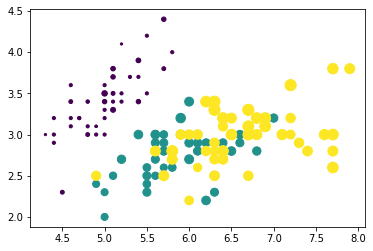

In [23]:
plt.scatter(df['SepalLength'], df['SepalWidth'], c=df['Type'], s=df['PetalWidth']*50); # parameter s

## Exercice

### visualisation de données sur des vins italiens

Ces données sont le résultat d'analyses chimiques de vins, cultivés dans une même région d'Italie, mais issus de trois cultivateurs différents. Les données sont les quantités, trouvées dans les vins, de 13 constituants.

Le fichier s'appelle `wine.csv`. La première ligne contient les noms des colonnes et la première colonne identifie le cultivaleur 1, 2 et 3.
   1. lisez le fichier *csv* en ne gardant que les colonnes \['cultivator', 'alcohol', 'malic-acid', 'ash','total-phenols', 'flavanoids','Color-intensity', 'Hue'\]  
   (indice utilisez: `use_cols`)
   1. afficher le header de la dataframe
   1. afficher les types déterminés par `pandas`
   1. afficher les statistiques simples (minimum, maximum, moyenne, écart-type...)
   1. plottez la dataframe en lui passant le paramètre *figsize=(10, 10)*
   1. plottez la dataframe restreinte aux deux colonnes \['flavanoids', 'cultivator'\]
   1. visualisez les boxplots de la dataframe utilisez la fonction *plt.xticks(rotation=90)* pour mieux voir les labels des abscisses
   1. visualisez des histogrammes avec des regroupements de 20 éléments
   1. afficher l'alcool en fonction de l'acide malique avec comme couleur les numéros des cultivateurs.